In [1]:
from deltalib import *

In [2]:
with open('delta.dat', 'r') as f:
     data = f.readlines()

In [3]:
to_plot = parse_data(data)

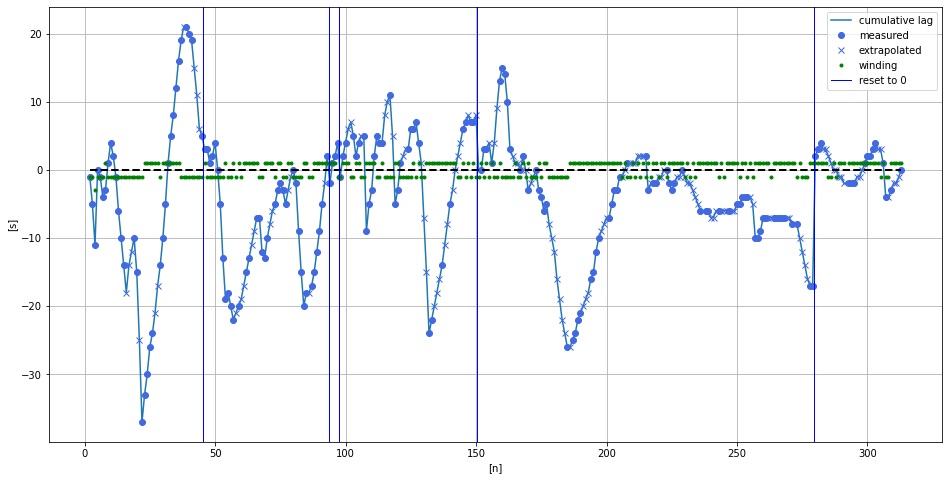

In [4]:
plot_lag(to_plot)

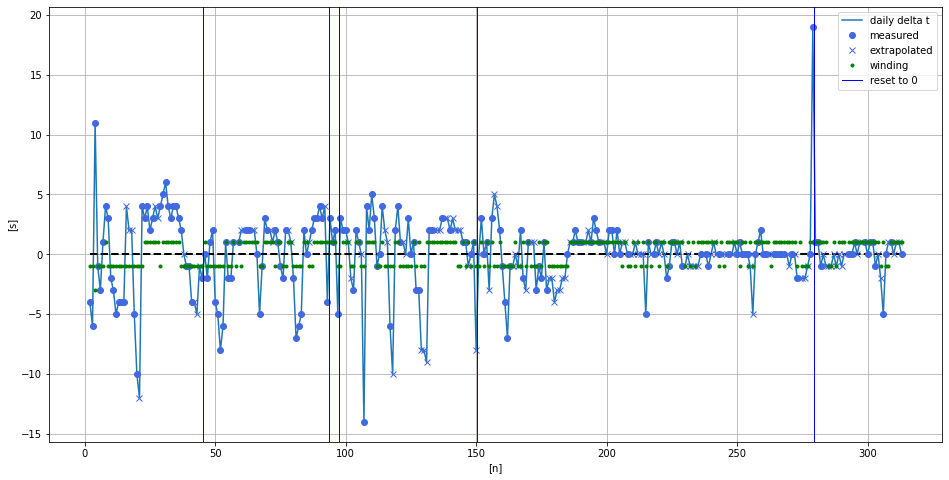

In [5]:
plot_delta(to_plot)

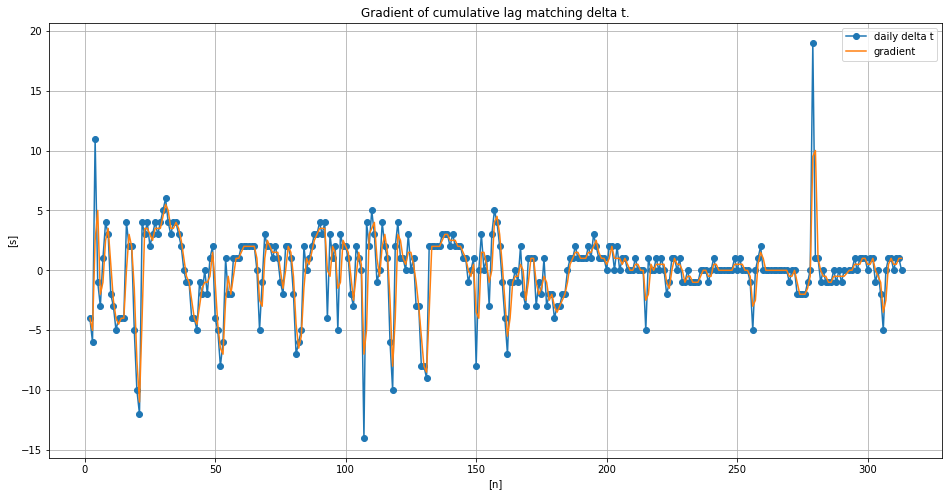

In [6]:
plot_deriv(to_plot)